In [1]:
# 
# 1. PRECOG example
# https://precog.stanford.edu/precog_metaZ.datatable.php

# 2. query
# gene: TYMS (D00596_at)
# cancer: Brain cancer Medulloblastoma

# 3. question
# Why does blue line fall to zero steeply?

# 4. data
# dowloaded from PRECOG website

# R 

# 

Warning message:
"package 'IRdisplay' was built under R version 3.2.5"

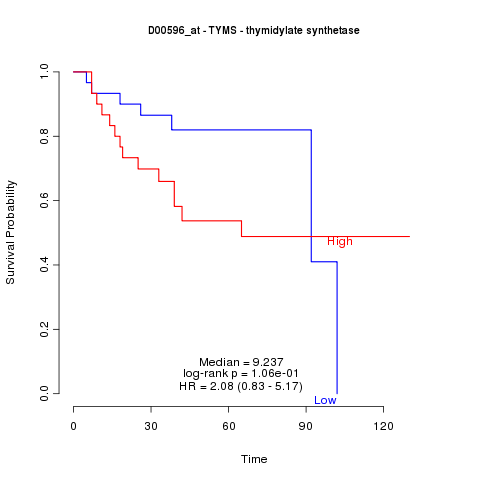

In [2]:
# screenshot of original figure
library(IRdisplay)

display_png(file='Brain_cancer.Medulloblastoma.Pomeroy_CNS.GPL80.OS.D00596_at.png')

In [3]:
library(survival)
library(readr)
library(plyr)
library(GGally)

Warning message:
"package 'survival' was built under R version 3.2.3"Warning message:
"package 'readr' was built under R version 3.2.3"Warning message:
"package 'GGally' was built under R version 3.2.3"

In [4]:
# survival information

df.info <- readr::read_tsv('Pomeroy_CNS.info.tsv')
head(df.info)

Array,OS_Time,OS_Status
Brain_MD_1,11,1
Brain_MD_2,5,1
Brain_MD_3,7,1
Brain_MD_4,7,1
Brain_MD_5,7,1
Brain_MD_6,9,1


In [5]:
# gene expression

df.exp <- readr::read_tsv('Pomeroy_CNS.GPL80.matrix.txt')
head(df.exp)

Gene,Name,Brain_MD_1,Brain_MD_2,Brain_MD_3,Brain_MD_4,Brain_MD_5,Brain_MD_6,Brain_MD_7,Brain_MD_8,...,Brain_Ncer_1,Brain_Ncer_2,Brain_Ncer_3,Brain_Ncer_4,Brain_PNET_1,Brain_PNET_2,Brain_PNET_3,Brain_PNET_4,Brain_PNET_5,Brain_PNET_6
A28102_at,"GABRA3 - gamma-aminobutyric acid (GABA) A receptor, alpha 3",7.727921,6.870365,8.515699,9.294621,8.092757,5.426265,7.149747,10.603626,...,8.092757,9.698705,5.000000,6.629356,7.924812,7.554589,8.761551,7.562243,9.250298,8.257388
AB000114_at,OMD - osteomodulin,1.584962,0.000000,0.000000,7.888743,7.467606,5.169925,6.629356,0.000000,...,0.000000,7.813781,0.000000,0.000000,5.643856,5.781360,7.906890,3.169925,0.000000,7.888743
AB000115_at,IFI44L - interferon-induced protein 44-like,6.507795,9.033423,7.257388,7.000000,7.366322,0.000000,7.055283,6.741467,...,7.584962,9.505812,8.405142,8.339850,5.321928,8.417852,9.958552,7.523562,8.103288,7.781360
AB000220_at,"SEMA3C - sema domain, immunoglobulin domain (Ig), short basic domain, secreted, (semaphorin) 3C",9.306062,7.882643,6.539159,6.918863,9.971543,5.832890,7.658212,6.129283,...,8.159871,9.426265,7.693487,7.546895,8.005625,6.247928,6.392317,8.734710,7.285402,11.310044
AB000381_s_at,GML - glycosylphosphatidylinositol anchored molecule like protein,4.584962,4.523562,5.459432,0.000000,2.584963,0.000000,5.727921,2.584963,...,4.584962,4.392317,0.000000,5.554589,6.339850,6.209454,6.129283,0.000000,0.000000,6.794416
AB000409_at,MKNK1 - MAP kinase interacting serine/threonine kinase 1,4.523562,4.169925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.614710,7.918863,2.807355,0.000000,0.000000,6.285402,0.000000,7.238405,6.857981,6.189825


In [6]:
# integrate data

# expression
df.exp <- subset(df.exp, Gene == 'D00596_at')
rownames(df.exp) <- 'expression'
df.exp$Gene <- NULL
df.exp$Name <- NULL
df.exp <- data.frame(t(df.exp))
df.exp$sample <- rownames(df.exp)

# survival
names(df.info) <- c('sample', 'time', 'status')
df.info <- subset(df.info, ! is.na(time))

# merge
df <- plyr::join(df.info, df.exp, by='sample', type='inner')
df$group <- ifelse(df$expression > median(df$expression), 'High', 'Low')
df <- df[order(df$time), ]

nrow(df)
head(df)

[1] 60

,sample,time,status,expression,group
2,Brain_MD_2,5,1,9.370687,High
3,Brain_MD_3,7,1,10.166163,High
4,Brain_MD_4,7,1,6.643856,Low
5,Brain_MD_5,7,1,9.796040,High
6,Brain_MD_6,9,1,9.651052,High
1,Brain_MD_1,11,1,9.634811,High


Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.2.4"
Attaching package: 'scales'

The following objects are masked from 'package:readr':

    col_factor, col_numeric



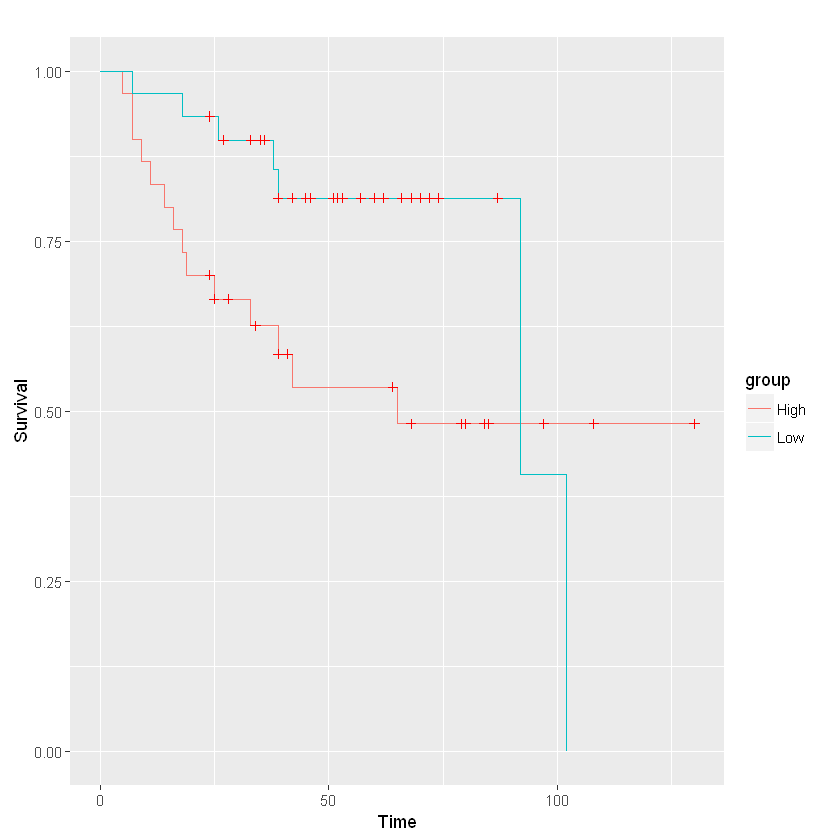

In [7]:
# survival analysis

# compute a survival curve
fit <- survfit(Surv(time, status) ~ group, data=df)

# Kaplan-Meier curve
GGally::ggsurv(fit)

In [8]:
# have a look at data of low-level group (blue line)

df.low <- df[df$group == 'Low', c('time', 'status')]
rownames(df.low) <- 1:nrow(df.low)

# 30 patients
# nrow(df.low)

df.low

time,status
7,1
18,1
24,0
26,1
27,0
33,0
35,0
35,0
36,0
38,1


In [9]:
# calculate Kaplan-Meier estimates

# count censored and dead patients for each time
df.low <- ddply(df.low, .(time), summarize,
                n_death = sum(status == 1),
                n_censored = sum(status == 0))

# t = 0
df.low <- rbind(c(0, 0, 0), df.low)

# calculate number at risk
df.low$n_at_risk <- rev(cumsum(rev(df.low$n_death + df.low$n_censored)))

# hide censored data
df.low <- subset(df.low, n_death > 0 | time == 0)
df.low$n_censored <- NULL
rownames(df.low) <- NULL

# conditional probability at time t
# p = 1 - n_death / n_at_risk
df.low$p <- 1 - df.low$n_death / df.low$n_at_risk

# probability of surviving
# s(n) = s(n-1) * p(n)
df.low$s <- cumprod(df.low$p)

# reorder the columns
df.low <- df.low[, c('time', 'n_at_risk', 'n_death', 'p', 's')]

df.low

time,n_at_risk,n_death,p,s
0,30,0,1.0000000,1.0000000
7,30,1,0.9666667,0.9666667
18,29,1,0.9655172,0.9333333
26,27,1,0.9629630,0.8987654
38,21,1,0.9523810,0.8559671
39,20,1,0.9500000,0.8131687
92,2,1,0.5000000,0.4065844
102,1,1,0.0000000,0.0000000
